<a href="https://colab.research.google.com/github/Hanpablo/-course/blob/main/Machine_Learning_case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Break Out Room 1:


*   M. Bari Akhdan P.
*   almi budiman
*   husnul
*   syihan



# Bagian Baru

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#Data Preparation

In [ ]:
df = pd.read_csv("Ecommerce-Studikasus.csv")

In [ ]:
df

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...
4499,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,Jumpsuit Jumbo Wanita Bigsize Big Size Panjang...,https://www.tokopedia.com/tokowislywis/jumpsui...
4500,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,0,105000,358247047,99,5,Strong Woman,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,https://www.tokopedia.com/strongwoman/baju-kem...
4501,Fashion Wanita,Kota Tangerang Selatan,True,https://ecs7.tokopedia.net/img/cache/200-squar...,18,0,Kota Tangerang Selatan,0,50000,335503058,99,5,Michary Shop,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,https://www.tokopedia.com/mamanacaca/daster-ta...


In [ ]:
df_sorted = df.sort_values("quantity_sold_new", ascending=False)
df_sorted

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url
2064,Fashion Wanita,Kota Bandung,False,https://ecs7.tokopedia.net/img/cache/200-squar...,109,"2,800",Kota Bandung,0,90750,353916614,6401,5,Tuasan Store,Blouse,BAJU ATASAN TUNIK WANITA TERBARU JUMBO BLOUSE ...,https://www.tokopedia.com/tuasanstore/baju-ata...
2063,Fashion Wanita,Kota Bandung,False,https://ecs7.tokopedia.net/img/cache/200-squar...,60,0,Kota Bandung,0,97750,353915976,5913,5,Tuasan Store,Blouse,BAJU ATASAN TUNIK WANITA TERBARU JUMBO BLOUSE ...,https://www.tokopedia.com/tuasanstore/baju-ata...
2062,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,671,0,Kota Bandung,0,41998,199288388,5443,5,multishop_bdg,Sweater,Boxy premium jumbo | sweater rajut | baju raju...,https://www.tokopedia.com/multishopbdg/boxy-pr...
2061,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,5,7000,Jakarta,0,199250,211361532,5015,4,chibishop,Maxi Dress,GAUN PANJANG PESTA PARTY MAXI LONG DRESS BAJU ...,https://www.tokopedia.com/chibishopping/gaun-p...
2060,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,1231,"90,600",Jakarta,0,53000,246580930,3969,5,Chel&#39;z Shop,Piyama,Baju Tidur Cewek/Wanita Piyama Pajamas Satin M...,https://www.tokopedia.com/chelshopceria/baju-t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,20,0,Jakarta,0,80000,282997921,0,5,Parrot Computer,Daster,Daster Wanita Lingerie Cewek Baju Tidur Seksi ...,https://www.tokopedia.com/parrotcomputer/daste...
536,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,15,0,Jakarta,0,105000,344172303,0,4,Parrot Computer,Lingerie,Lingerie Seksi Baju Tidur Wanita Lingeri 004 N...,https://www.tokopedia.com/parrotcomputer/linge...
537,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,13,0,Jakarta,0,20000,308941619,0,4,Bajummi,Blouse,Blouse Atasan Baju Wanita Kekinian Motif Salur...,https://www.tokopedia.com/bajummi/blouse-atasa...
538,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,10,0,Jakarta,0,35000,334807054,0,5,Online Fashion Style,Lingerie,Lingerie jaring Dress Seksi Wanita Babydoll Fi...,https://www.tokopedia.com/styleonline/lingerie...


#Checking missing values

In [ ]:
df.isna().sum()

category             0
city                 0
gold_merchant        0
image_url            0
jumlah_review        0
jumlah_view          0
location             0
presentase_diskon    0
price                0
product_id           0
quantity_sold_new    0
rating               0
shop_name            0
subcategory          0
title                0
url                  0
dtype: int64

#Checking Irregular Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold_new  4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

In [ ]:
df['jumlah_view'] = df['jumlah_view'].str.replace(',','')
df['jumlah_view'] = df['jumlah_view'].str.rstrip('K')
df['jumlah_view'] = df['jumlah_view'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   int64 
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold_new  4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(7), object(8)
memory usa

#Checking for duplicated values

In [ ]:
df.duplicated().sum()

0

#Normality Test & Outlier Detection

##jumlah review

In [ ]:
df["jumlah_review"].describe()

count    4503.000000
mean       23.664446
std        71.927542
min         0.000000
25%         3.000000
50%         8.000000
75%        24.000000
max      1629.000000
Name: jumlah_review, dtype: float64

<Axes: >

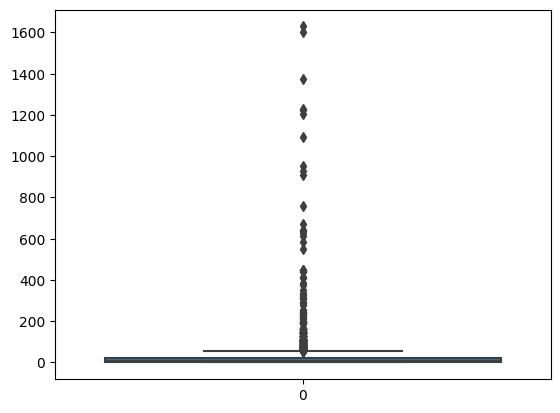

In [ ]:
sns.boxplot(df["jumlah_review"])

Walaupun julah review memiliki banyak outliers, maka akan dibiarkan dikarenakan karakter data dan konteks bisnis

##Jumlah View

In [ ]:
df["jumlah_view"].describe()

count     4503.000000
mean       580.012214
std       3212.409698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      90600.000000
Name: jumlah_view, dtype: float64

<Axes: >

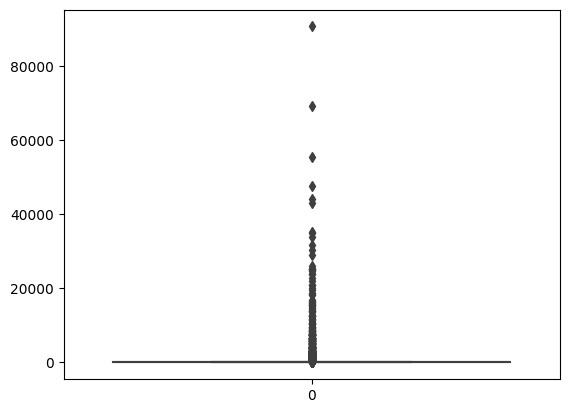

In [ ]:
sns.boxplot(df["jumlah_view"])

Walaupun julah review memiliki banyak outliers, maka akan dibiarkan dikarenakan karakter data dan konteks bisnis

##Presentase Diskon

In [ ]:
df['presentase_diskon'].describe()

count    4503.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: presentase_diskon, dtype: float64

tidak ada produk yang memiliki diskon, maka kolom akan di drop

In [ ]:
df.drop(columns=['presentase_diskon'], inplace=True)
df.head(5)

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...


##Price

In [ ]:
df['price'].describe()

count    4.503000e+03
mean     9.780626e+04
std      8.468117e+04
min      7.500000e+03
25%      5.490000e+04
50%      7.800000e+04
75%      1.190000e+05
max      2.200000e+06
Name: price, dtype: float64

<Axes: >

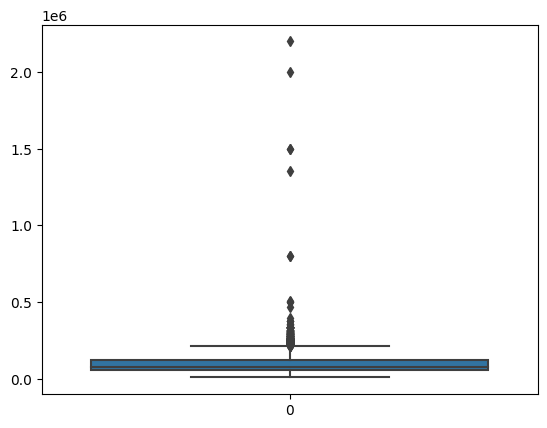

In [ ]:
sns.boxplot(df["price"])

In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = outliers(df, "price")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  215150.0
Lower:  -41250.0


In [ ]:
df = df[(df["price"] > lower) & (df["price"] < upper)]

<Axes: ylabel='price'>

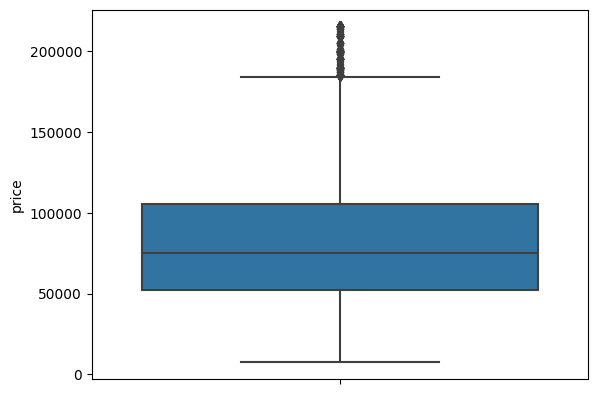

In [ ]:
sns.boxplot(y=df["price"])

Untuk memastikan relevansi data, produk dengan harga yang terlalu tinggi akan dihilangkan dan dianggap sebagai outliers

##quantity_sold_new

In [ ]:
df["quantity_sold_new"].describe()

count    4201.000000
mean       71.618662
std       260.354644
min         0.000000
25%         1.000000
50%        12.000000
75%        40.000000
max      6401.000000
Name: quantity_sold_new, dtype: float64

<Axes: ylabel='quantity_sold_new'>

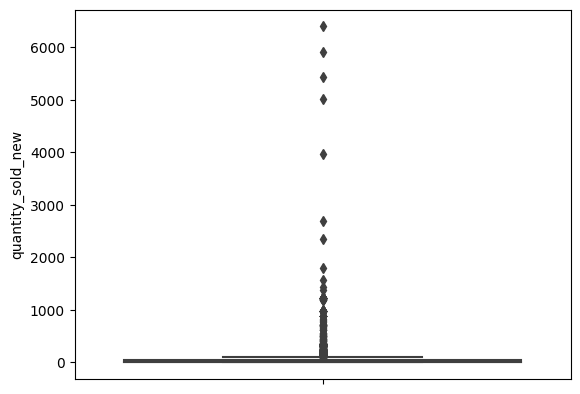

In [ ]:
sns.boxplot(y=df["quantity_sold_new"])

Walaupun kolom quantity sold new memiliki banyak ouliers, namun dikarenakan karakter data dan konteks bisnis akan dibiarkan

##Rating

In [ ]:
df["rating"].describe()

count    4201.000000
mean        4.872411
std         0.348334
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

<Axes: ylabel='rating'>

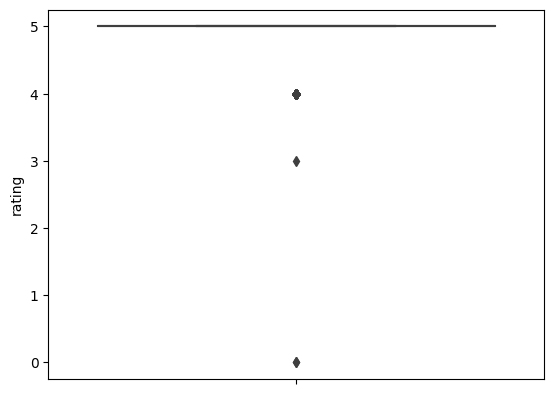

In [ ]:
sns.boxplot(y=df["rating"])

tidak ada data yang diatas 5 atau dibawah 0 sehingga tidak ada outliers

#Uji Linearitas

In [ ]:
df.corr()

,gold_merchant,jumlah_review,jumlah_view,price,product_id,quantity_sold_new,rating
gold_merchant,1.000000,0.012187,0.088403,-0.200299,-0.232463,-0.132954,-0.108026
jumlah_review,0.012187,1.000000,0.260172,-0.059734,0.031849,0.247436,-0.102569
jumlah_view,0.088403,0.260172,1.000000,-0.040277,-0.178755,0.262443,-0.095713
price,-0.200299,-0.059734,-0.040277,1.000000,-0.022211,0.017258,0.118803
product_id,-0.232463,0.031849,-0.178755,-0.022211,1.000000,0.059112,0.208437
quantity_sold_new,-0.132954,0.247436,0.262443,0.017258,0.059112,1.000000,0.014074
rating,-0.108026,-0.102569,-0.095713,0.118803,0.208437,0.014074,1.000000


<Axes: >

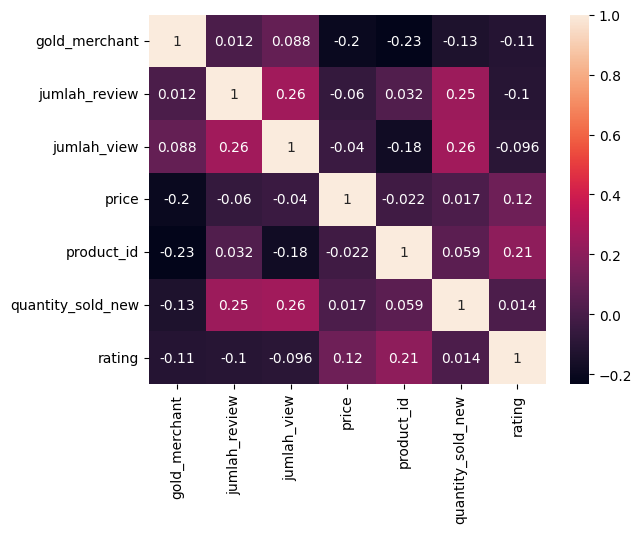

In [ ]:
sns.heatmap(df.corr(), annot=True)

berdasarkan analisis korelasi diatas, dapat disimpulkan:


*   Tidak ada variabel yang memiliki hubungan sangat kuat, namun terdapat beberapa variabel yang memiliki korelasi positif
*   Terdapat korelasi antara jumlah review dengan quantity sold new, dan jumlah view dengan quantity sold new 


##Explorasi lebih lanjut

In [ ]:
##Explorasi lebih lanjut

In [ ]:
df.columns

Index(['category', 'city', 'gold_merchant', 'image_url', 'jumlah_review',
       'jumlah_view', 'location', 'price', 'product_id', 'quantity_sold_new',
       'rating', 'shop_name', 'subcategory', 'title', 'url'],
      dtype='object')

<Axes: xlabel='quantity_sold_new', ylabel='jumlah_review'>

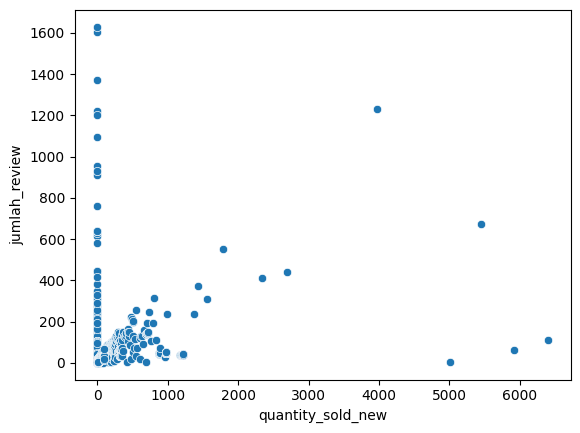

In [ ]:
sns.scatterplot(data=df, x="quantity_sold_new", y="jumlah_review")

<Axes: xlabel='quantity_sold_new', ylabel='jumlah_view'>

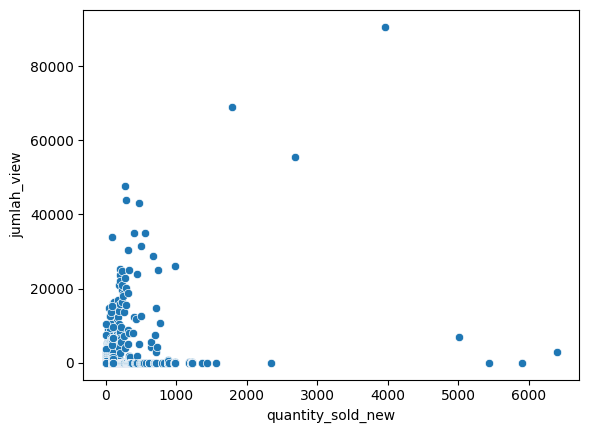

In [ ]:
sns.scatterplot(data=df, x="quantity_sold_new", y="jumlah_view")

<Axes: xlabel='jumlah_view', ylabel='jumlah_review'>

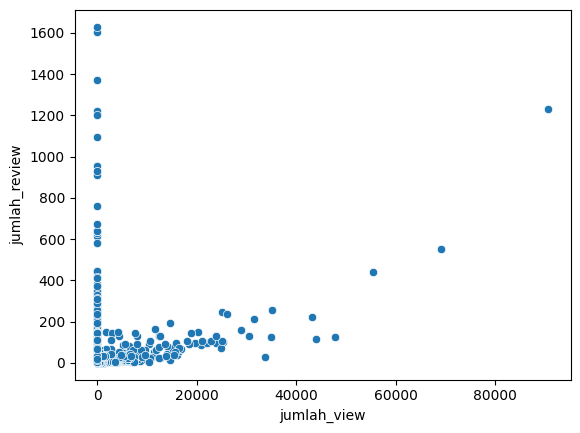

In [ ]:
sns.scatterplot(data=df, x="jumlah_view", y="jumlah_review")

# Uji Heteroskedastisitas

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

In [ ]:
X = df[["jumlah_view", "jumlah_review"]]
Y = df["quantity_sold_new"]

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,jumlah_view,jumlah_review
0,1.0,0,954
1,1.0,0,761
2,1.0,0,439
3,1.0,0,909
4,1.0,0,614
...,...,...,...
4497,1.0,0,32
4498,1.0,0,33
4500,1.0,0,31
4501,1.0,0,18


In [ ]:
model = OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      quantity_sold_new   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     241.8
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          4.01e-100
Time:                        09:12:38   Log-Likelihood:                -29098.
No. Observations:                4201   AIC:                         5.820e+04
Df Residuals:                    4198   BIC:                         5.822e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.2696      4.019     11.263

Dari hasil output OLS Regression di atas, didapatkan model regresi linear berganda sebagai berikut:

quantity_sold_new = 45.2696 + 0.0168 * jumlah_view + 0.6733 * jumlah_review

Dari nilai koefisien R-squared dan Adj. R-squared, diperoleh nilai sebesar 0.103, yang menunjukkan bahwa hanya sekitar 10.3% dari variasi variabel quantity_sold_new dapat dijelaskan oleh kombinasi variabel jumlah_view dan jumlah_review dalam model ini. Selain itu, nilai Prob (F-statistic) yang sangat kecil (4.01e-100) menunjukkan bahwa model ini secara signifikan dapat memprediksi variabel dependen.

Koefisien untuk variabel independen jumlah_view adalah 0.0168, yang berarti jika jumlah_view meningkat sebanyak satu unit, maka quantity_sold_new akan meningkat sebesar 0.0168 unit, dengan asumsi variabel lainnya konstan. Sementara itu, koefisien untuk variabel independen jumlah_review adalah 0.6733, yang berarti jika jumlah_review meningkat sebanyak satu unit, maka quantity_sold_new akan meningkat sebesar 0.6733 unit, dengan asumsi variabel lainnya konstan.

Kesimpulannya, model regresi ini menunjukkan bahwa jumlah_view dan jumlah_review secara signifikan berpengaruh terhadap quantity_sold_new pada data yang diberikan, namun kedua variabel tersebut hanya dapat menjelaskan sedikit variasi dalam quantity_sold_new. Oleh karena itu, model ini mungkin tidak cukup kuat untuk digunakan sebagai alat prediksi yang akurat dalam hal ini.



#Modelling Linear Regression





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
X = df[["jumlah_view", "jumlah_review"]]
Y = df["quantity_sold_new"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(3360, 2) (3360,) (841, 2) (841,)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
example = [[50, 150]]
output = model.predict(example)
output

array([164.08429538])

In [ ]:
X_test

,jumlah_view,jumlah_review
2544,776,8
2419,0,1
370,0,33
2387,0,2
2132,0,6
...,...,...
4080,0,4
1607,0,60
158,0,1
1625,5800,47


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([  63.66586662,   44.53484999,   70.02231639,   45.33133332,
         48.51726662,   89.3376359 ,   59.66803317,  147.2811989 ,
         54.09264989,  103.00472902,   46.12781664,   44.53484999,
         45.33133332,   91.52736616,   46.12781664,   59.66803317,
         44.53484999,   53.29616657,   48.51726662,   44.53484999,
         75.59769966,  197.59712757,   85.95198288,   46.12781664,
         53.29616657,  160.27047822,   46.92429997,   51.934464  ,
         45.33133332,   45.33133332,   94.63224927,   46.12781664,
         59.66803317,   52.49968324,   50.90671659,   46.92429997,
         46.12781664,   45.33133332,   46.12781664,  113.82889925,
        658.07153586,   64.44693311,   50.11023327,   50.11023327,
         47.72078329,   46.12781664,   62.05748314,   54.88913322,
         48.51726662,   47.72078329,   45.33133332,   51.70319992,
         83.56253291,  127.76855522,   47.72078329,   45.33133332,
         49.31374994,  120.98904212,   67.63286641,   50.11023

In [ ]:
Y_test

2544     23
2419      2
370       0
2387      2
2132     16
       ... 
4080      7
1607    120
158       0
1625    122
1951    640
Name: quantity_sold_new, Length: 841, dtype: int64

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Score is:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 74.66703306880194
Mean Squared Error: 29447.43034163439
Root Mean Squared Error: 171.60253594173483
R Squared Score is: -0.054813281456065344


#Clustering

In [ ]:
df

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,0,Jakarta,185000,362776624,99,5,Hallo Modis,Dress Batik,Dress Batik Wanita Terbaru Dress Kerja Batik B...,https://www.tokopedia.com/hallomodis/dress-bat...
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...
4500,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,https://www.tokopedia.com/strongwoman/baju-kem...
4501,Fashion Wanita,Kota Tangerang Selatan,True,https://ecs7.tokopedia.net/img/cache/200-squar...,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,https://www.tokopedia.com/mamanacaca/daster-ta...


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model_kmeans = KMeans(n_clusters=3)

In [ ]:
X = df[["rating", "quantity_sold_new", "price"]]

In [ ]:
X

,rating,quantity_sold_new,price
0,5,0,55000
1,5,0,65000
2,5,0,59000
3,5,0,59000
4,5,0,55000
...,...,...,...
4497,5,99,185000
4498,5,99,131500
4500,5,99,105000
4501,5,99,50000


In [ ]:
model_kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
model_kmeans.labels_

array([0, 0, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
df['cluster'] = model_kmeans.labels_
df

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url,cluster
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...,0
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...,0
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...,0
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...,0
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,0,Jakarta,185000,362776624,99,5,Hallo Modis,Dress Batik,Dress Batik Wanita Terbaru Dress Kerja Batik B...,https://www.tokopedia.com/hallomodis/dress-bat...,1
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...,2
4500,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,https://www.tokopedia.com/strongwoman/baju-kem...,2
4501,Fashion Wanita,Kota Tangerang Selatan,True,https://ecs7.tokopedia.net/img/cache/200-squar...,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,https://www.tokopedia.com/mamanacaca/daster-ta...,0


In [ ]:
from sklearn import metrics

print('Akurasi: ', metrics.silhouette_score(X, model_kmeans.labels_))

Akurasi:  0.5621977896658771


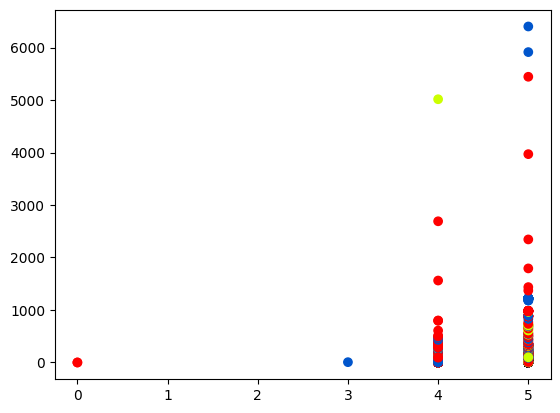

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['rating'], df['quantity_sold_new'], c=df['c'])
plt.show()

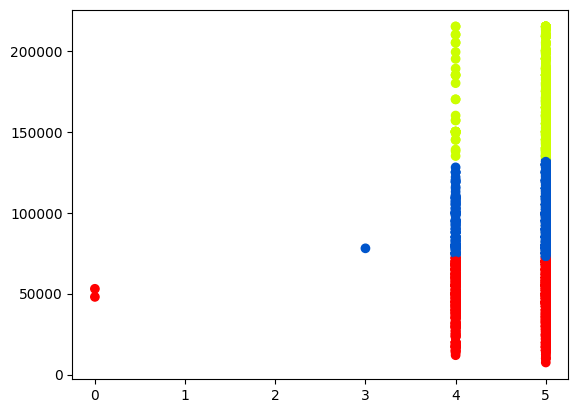

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['rating'], df['price'], c=df['c'])
plt.show()

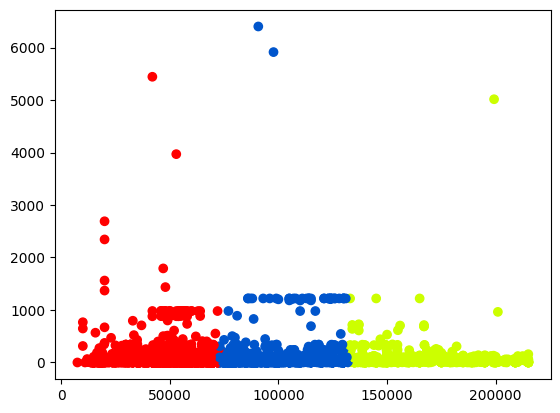

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['price'], df['quantity_sold_new'], c=df['c'])
plt.show()

In [ ]:
df[df['cluster'] == 0]

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url,cluster,x,y,c
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...,0,4.835294,67.632843,#ff0000
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...,0,4.835294,67.632843,#ff0000
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...,0,4.835294,67.632843,#ff0000
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...,0,4.835294,67.632843,#ff0000
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...,0,4.835294,67.632843,#ff0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,347,Jakarta,65500,366319191,97,5,Toko Afsheen Myesha,Sweater,Sweater Wanita Rajut Cewek Baju Atasan Outer M...,https://www.tokopedia.com/afsheenmyesha1/sweat...,0,4.835294,67.632843,#ff0000
4485,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,41900,351042261,97,5,Best OnlineStore,Blouse,Baju Atasan Wanita Talisa Blouse Tunik Baju Mu...,https://www.tokopedia.com/bestonstor/baju-atas...,0,4.835294,67.632843,#ff0000
4488,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,25,0,Jakarta,69000,264894815,97,4,Parrot Computer,Lingerie,Kimono Lingerie 01 Pink Sexy Lingeri Seksi Mur...,https://www.tokopedia.com/parrotcomputer/kimon...,0,4.835294,67.632843,#ff0000
4492,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,67000,357556359,98,5,Woman Power,Kemeja,Kemeja Wanita Atasan Baju Kerja Kantor Lengan ...,https://www.tokopedia.com/womanpower/kemeja-wa...,0,4.835294,67.632843,#ff0000


In [ ]:
df[df['cluster'] == 0].describe()

,jumlah_review,jumlah_view,price,product_id,quantity_sold_new,rating,cluster,x,y
count,2040.000000,2040.000000,2040.000000,2.040000e+03,2040.000000,2040.000000,2040.0,2040.000000,2040.000000
mean,30.953431,703.803922,49528.296078,2.840287e+08,67.632843,4.835294,0.0,4.835294,67.632843
std,103.079752,4044.680691,15100.371873,7.225448e+07,234.012133,0.396564,0.0,0.000000,0.000000
min,0.000000,0.000000,7500.000000,2.311267e+06,0.000000,0.000000,0.0,4.835294,67.632843
25%,3.000000,0.000000,39998.500000,2.518299e+08,0.000000,5.000000,0.0,4.835294,67.632843
50%,8.000000,0.000000,51950.000000,3.006257e+08,12.000000,5.000000,0.0,4.835294,67.632843
75%,24.000000,0.000000,62000.000000,3.369699e+08,38.250000,5.000000,0.0,4.835294,67.632843
max,1629.000000,90600.000000,72500.000000,3.761936e+08,5443.000000,5.000000,0.0,4.835294,67.632843


In [ ]:
df[df['cluster'] == 1]

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url,cluster,x,y,c
8,Fashion Wanita,Kota Surakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,1,0,Kota Surakarta,209000,331697517,0,5,Pusat Batik Sarimbit,Batik Couple,Baju COuple 246 BIRU Batik Sarimbit Pria Wanit...,https://www.tokopedia.com/GrosirSarimbit/baju-...,1,4.939837,72.230894,#ccff00
9,Fashion Wanita,Kota Surakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,1,0,Kota Surakarta,159000,329794620,0,5,Pusat Batik Sarimbit,Batik Couple,Baju Couple 026 PD MAROON Batik Sarimbit Pria ...,https://www.tokopedia.com/GrosirSarimbit/baju-...,1,4.939837,72.230894,#ccff00
10,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,4,0,Kota Bandung,215000,278161850,0,5,FashionOnline,Jaket,Jaket mantel coat baju hangat wanita korea Mur...,https://www.tokopedia.com/fashiononline07/jake...,1,4.939837,72.230894,#ccff00
16,Fashion Wanita,Kota Tangerang,False,https://ecs7.tokopedia.net/img/cache/200-squar...,11,0,Kota Tangerang,195000,356995755,0,5,Ladys 88,Blouse,Baju Atasan Brukat Wanita Terbaru Blouse Berku...,https://www.tokopedia.com/ladys88/baju-atasan-...,1,4.939837,72.230894,#ccff00
23,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,2,0,Jakarta,155000,357652732,0,5,Vintagelicious,Kebaya,BAJU KONDANGAN WANITA ATASAN KEBAYA BROKAT BRU...,https://www.tokopedia.com/vintagelicious/baju-...,1,4.939837,72.230894,#ccff00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,0,Jakarta,156000,363310592,96,5,Toko Laris Ceni,Mini Dress,Gaun Wanita Dress Import Baju Murah Mini Pende...,https://www.tokopedia.com/tokolarisceni/gaun-w...,1,4.939837,72.230894,#ccff00
4473,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,0,Jakarta,182000,362345470,96,5,Toko Yuga Ca,Mini Dress,Mini Dress Brukat Minidress Baju Gaun Wanita M...,https://www.tokopedia.com/tokoyugaca/mini-dres...,1,4.939837,72.230894,#ccff00
4484,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,175500,366247461,97,5,Toko Adeeva Adiva,Vest,Vest Rompi Wanita Baju Luaran Outer Murah Cewe...,https://www.tokopedia.com/adeevaadiva/vest-rom...,1,4.939837,72.230894,#ccff00
4497,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,32,0,Jakarta,185000,362776624,99,5,Hallo Modis,Dress Batik,Dress Batik Wanita Terbaru Dress Kerja Batik B...,https://www.tokopedia.com/hallomodis/dress-bat...,1,4.939837,72.230894,#ccff00


In [ ]:
df[df['cluster'] == 1].describe()

,jumlah_review,jumlah_view,price,product_id,quantity_sold_new,rating,cluster,x,y
count,615.000000,615.000000,615.000000,6.150000e+02,615.000000,615.000000,615.0,6.150000e+02,6.150000e+02
mean,20.209756,307.169106,168325.785366,2.844653e+08,72.230894,4.939837,1.0,4.939837e+00,7.223089e+01
std,25.343630,1060.445947,24342.730535,9.205198e+07,243.762591,0.237981,0.0,8.889014e-16,1.422242e-14
min,1.000000,0.000000,132660.000000,3.187613e+06,0.000000,4.000000,1.0,4.939837e+00,7.223089e+01
25%,3.000000,0.000000,148000.000000,2.204560e+08,4.000000,5.000000,1.0,4.939837e+00,7.223089e+01
50%,11.000000,0.000000,165000.000000,3.189068e+08,20.000000,5.000000,1.0,4.939837e+00,7.223089e+01
75%,30.000000,0.000000,189000.000000,3.569104e+08,60.000000,5.000000,1.0,4.939837e+00,7.223089e+01
max,148.000000,9200.000000,215000.000000,3.754054e+08,5015.000000,5.000000,1.0,4.939837e+00,7.223089e+01


In [ ]:
df[df['cluster'] == 2]

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url,cluster,x,y,c
5,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,1,0,Jakarta,92000,307350951,0,5,Amelie Butik Wholesale,Celana Pendek,Celana Pendek Karet Wanita Baju Bangkok Korea ...,https://www.tokopedia.com/amelie-wholesale/cel...,2,4.894567,76.634541,#0055cc
17,Fashion Wanita,Kota Salatiga,True,https://ecs7.tokopedia.net/img/cache/200-squar...,2,0,Kota Salatiga,89500,375935867,0,5,MARTOB Organizer,Blouse,Jumbo Korean Blouse Baju Atasan wanita bigsize...,https://www.tokopedia.com/martoborganizer/jumb...,2,4.894567,76.634541,#0055cc
18,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,2,0,Jakarta,110000,289301712,0,5,LAVELA ID,Dress Batik,DRESS ATASAN BLOUSE BAJU BATIK WANITA MURAH / ...,https://www.tokopedia.com/lavelaid-04/dress-at...,2,4.894567,76.634541,#0055cc
19,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,1,0,Jakarta,85000,287223608,0,5,LAVELA ID,Blouse Batik,DRESS ATASAN BLOUSE BAJU BATIK WANITA MURAH / ...,https://www.tokopedia.com/lavelaid-04/dress-at...,2,4.894567,76.634541,#0055cc
21,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,1,0,Jakarta,85000,285894409,0,5,LAVELA ID,Blouse Batik,DRESS ATASAN BLOUSE BAJU BATIK WANITA MURAH / ...,https://www.tokopedia.com/lavelaid-04/dress-at...,2,4.894567,76.634541,#0055cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,Fashion Wanita,Kota Surabaya,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,1100,Kota Surabaya,105000,352938860,99,5,StarStore Dua,Blouse,BAJU BLOUSE BAJU ATASAN WANITA BLOUSE JUMBO BL...,https://www.tokopedia.com/starstoredua/baju-bl...,2,4.894567,76.634541,#0055cc
4495,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,125000,366248911,99,5,Toko Adeeva Adiva,Vest,Vest Cewek Wanita Rompi Baju Luaran Outer Mura...,https://www.tokopedia.com/adeevaadiva/vest-cew...,2,4.894567,76.634541,#0055cc
4496,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,119900,363747051,99,5,Toko Dewi Feni,Jumpsuit,Jumpsuit Sabrina Jampsuit Jump Jamp Suit Murah...,https://www.tokopedia.com/tokodewifeni/jumpsui...,2,4.894567,76.634541,#0055cc
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...,2,4.894567,76.634541,#0055cc


In [ ]:
df[df['cluster'] == 2].describe()

,jumlah_review,jumlah_view,price,product_id,quantity_sold_new,rating,cluster,x,y
count,1546.000000,1546.000000,1546.000000,1.546000e+03,1546.000000,1546.000000,1546.0,1.546000e+03,1.546000e+03
mean,16.805304,578.165589,95736.098318,2.762835e+08,76.634541,4.894567,2.0,4.894567e+00,7.663454e+01
std,24.729611,2715.016120,16524.190804,8.879704e+07,297.215198,0.309310,0.0,8.884658e-16,1.421545e-14
min,1.000000,0.000000,72700.000000,1.432960e+06,0.000000,3.000000,2.0,4.894567e+00,7.663454e+01
25%,3.000000,0.000000,80000.000000,2.305550e+08,2.000000,5.000000,2.0,4.894567e+00,7.663454e+01
50%,7.000000,0.000000,94000.000000,2.989934e+08,11.000000,5.000000,2.0,4.894567e+00,7.663454e+01
75%,21.000000,0.000000,107000.000000,3.509869e+08,40.000000,5.000000,2.0,4.894567e+00,7.663454e+01
max,338.000000,47700.000000,132000.000000,3.759359e+08,6401.000000,5.000000,2.0,4.894567e+00,7.663454e+01



*   cluster 0: cluster 0 terdiri dari produk yang memiliki potensi terkecil berdasarkan rating, penjualan, dan harga
*   cluster 1: cluster 1 terdiri dari produk yang memiliki potensi menengah berdasarkan rating, penjualan, dan harga
*   cluster 2: cluster 2 terdiri dari produk yang memiliki potensi tertinggi berdasarkan rating, penjualan, dan harga


## Elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 20634.841454462374
3 : 14190.166034310563
4 : 11101.492446487826
5 : 8980.803812985758
6 : 7168.225215154531
7 : 6263.057464714059
8 : 5384.249077279178
9 : 4966.009622035017


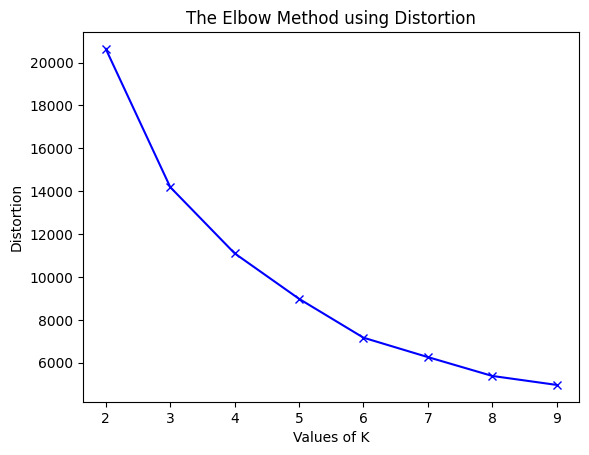

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

insight dr clustering.
1. Yang masuk dalam cluster 2 : semua toko yang belum menjadi gold merchant, otomatis akan kita jadikan gold merchant.

2. Kemudian yg dpt penjualan tertinggi di cluster 2, akan mendapatkan reward/bonus tertentu.

3. yang masuk dalam cluster 0 : gold merchant otomatis turun levelnya.

4. yang masuk cluster 0, kita berikan target untuk menaikan penjualan dan berikan reward jika berhasil menaikan penjualan.
